Name : Abhay Srivastava 

ML Assignment1 Submission

2021mt93594

In [703]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [704]:
# read the input file
data = pd.read_csv('student.csv')

In [705]:
# Attributes in data
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [706]:
# Statical analysis 

data['gender'].describe()

count     1000
unique       2
top       male
freq       841
Name: gender, dtype: object

In [707]:
data['math score'].describe()

count    997.000000
mean     119.010030
std       17.976443
min       50.000000
25%      109.000000
50%      120.000000
75%      131.000000
max      150.000000
Name: math score, dtype: float64

<Axes: xlabel='math score', ylabel='Count'>

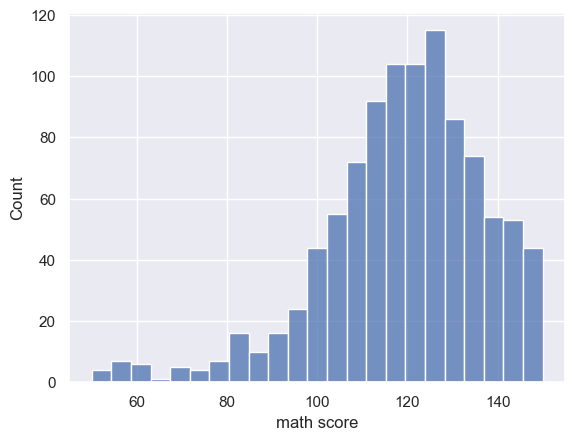

In [708]:
# distribution of math score 
sns.histplot(data['math score'])

In [709]:
data['reading score'].describe()

count    995.000000
mean     112.291457
std       16.430804
min       50.000000
25%      102.000000
50%      114.000000
75%      124.000000
max      148.000000
Name: reading score, dtype: float64

<Axes: xlabel='reading score', ylabel='Count'>

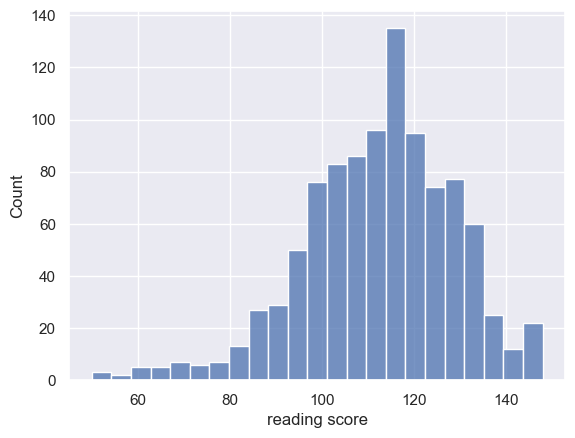

In [710]:
sns.histplot(data['reading score'])

In [711]:
data['writing score'].describe()

count    998.000000
mean     109.652305
std       17.619981
min       50.000000
25%       99.000000
50%      111.000000
75%      122.000000
max      147.000000
Name: writing score, dtype: float64

<Axes: xlabel='writing score', ylabel='Count'>

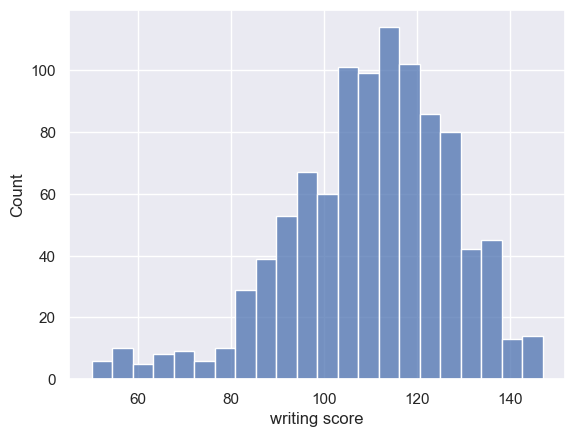

In [712]:
sns.histplot(data['writing score'])

# Relationship with numerical values

<Axes: xlabel='reading score', ylabel='math score'>

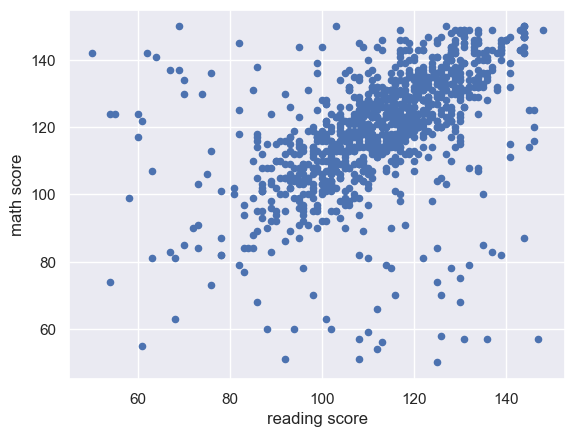

In [713]:
# relationship between 'reading score', 'math score'

var = 'reading score'
data_math_read = pd.concat([data[var],data['math score']], axis=1)
data_math_read.plot.scatter(x= var, y = 'math score' )

<Axes: xlabel='writing score', ylabel='math score'>

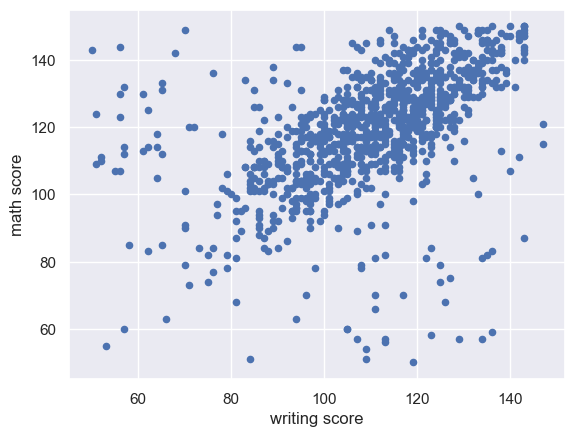

In [714]:
# relationship between 'writing score', 'math score'

var = 'writing score'
data_math_write = pd.concat([data[var],data['math score']], axis=1)
data_math_write.plot.scatter(x=var , y = 'math score' )

C:\Users\Abhay\AppData\Local\Temp\ipykernel_10700\3090418200.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


,math score,reading score,writing score
math score,1.000000,0.564163,0.550336
reading score,0.564163,1.000000,0.739746
writing score,0.550336,0.739746,1.000000


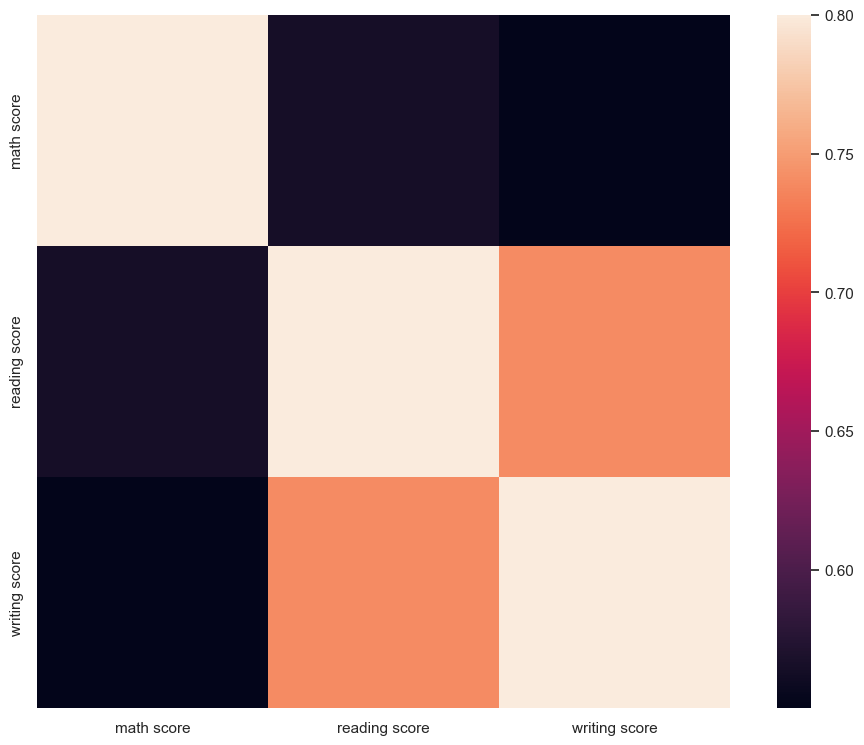

In [742]:
# Trying to create a heatmap correlation matrix 

corrmat = data.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True);


corrmat.sort_values(["math score"], ascending = False, inplace = True)

corrmat

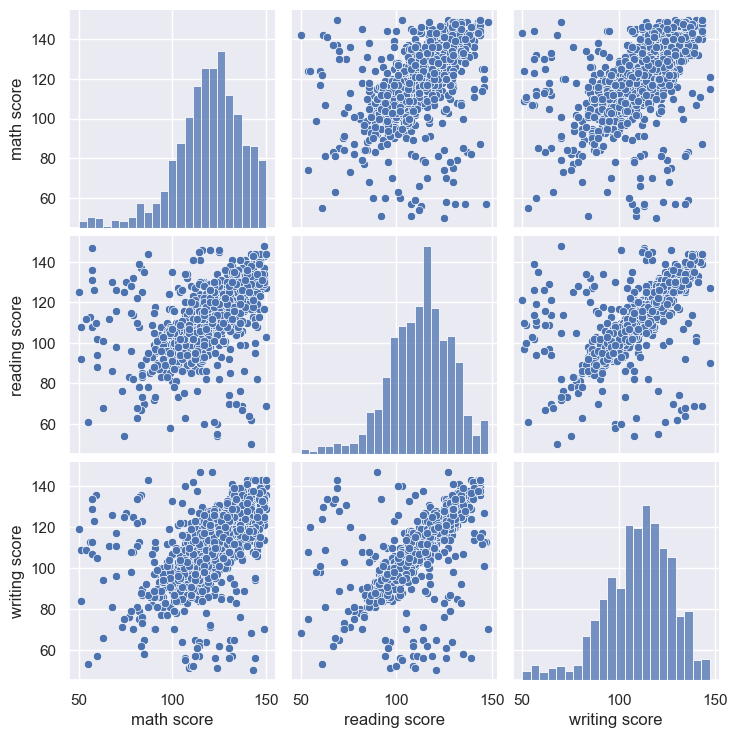

In [716]:
sns.set()
cols = ['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']

sns.pairplot(data[cols], height = 2.5)
plt.show()

## Finding the missing data

In [717]:
total = data.isnull() .sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
parental level of education,5,0.005
reading score,5,0.005
math score,3,0.003
writing score,2,0.002
gender,0,0.000
race,0,0.000


In [718]:
data = data.drop(data.loc[data['parental level of education'].isnull()].index)
data.shape

(995, 8)

In [719]:
# remove rows where reading score is null
data = data.drop(data.loc[data['reading score'].isnull()].index)

In [720]:
data.shape

(992, 8)

In [721]:
# remove rows where math score is null
data = data.drop(data.loc[data['math score'].isnull()].index)

In [722]:
data.shape


(991, 8)

In [723]:
# remove rows where writing score is null
data = data.drop(data.loc[data['writing score'].isnull()].index)

In [724]:
data.shape

(990, 8)

In [725]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,127.0,116.0,117.0
1,male,group E,bachelor's degree,standard,none,124.0,134.0,131.0
2,male,group B,bachelor's degree,standard,none,145.0,139.0,136.0
3,male,group C,some college,standard,none,102.0,101.0,87.0
4,male,group B,master's degree,standard,completed,131.0,122.0,118.0
...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,standard,completed,143.0,143.0,138.0
996,female,group C,some high school,standard,completed,117.0,99.0,98.0
997,male,group B,some college,free/reduced,none,78.0,115.0,108.0
998,male,group B,some high school,standard,none,128.0,122.0,120.0


## Removing the outliers 

From the distributiopn above , I can see that in certain cases reading score is less but still candidate have high  math score , similarly candidate have less writing score but still have high math score, that is something not possible. So these points can be considered as outliers. We can remove such points

In [726]:
mask = (data['reading score'] < 80) & (data['math score'] > 120)

In [727]:
mask.shape

(990,)

In [728]:
data = data.drop(data.loc[(data['reading score']<70) & (data['math score'] > 120)].index)
data.shape

(980, 8)

In [729]:
data = data.drop(data.loc[(data['writing score']<70) & (data['math score'] > 120)].index)
data.shape

(970, 8)

## Problem Statement

Based on the given data, we can frame a machine learning problem statement to predict the math, reading, or writing score of a student given their gender, race, parental level of education, lunch, and test preparation course.

We can approach this problem in different ways. One possible approach is to treat this as a regression problem, where the target variable is the score (math, reading, or writing) and the input variables are gender, race, parental level of education, lunch, and test preparation course.

In this case, we would need to preprocess the categorical variables (gender, race, parental level of education, lunch, and test preparation course) into numerical features that can be used by the machine learning algorithm. We can use techniques such as one-hot encoding, label encoding, or ordinal encoding for this purpose.

## Regression Model

In [730]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,127.0,116.0,117.0
1,male,group E,bachelor's degree,standard,none,124.0,134.0,131.0
2,male,group B,bachelor's degree,standard,none,145.0,139.0,136.0
3,male,group C,some college,standard,none,102.0,101.0,87.0
4,male,group B,master's degree,standard,completed,131.0,122.0,118.0
...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,standard,completed,143.0,143.0,138.0
996,female,group C,some high school,standard,completed,117.0,99.0,98.0
997,male,group B,some college,free/reduced,none,78.0,115.0,108.0
998,male,group B,some high school,standard,none,128.0,122.0,120.0


In [731]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['reading score', 'writing score']]
y = data['math score']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Squared Error: 179.0600851393339
Root Mean Squared Error: 13.381333458939505
R2 Score: 0.35086843811563395


### Trying to improve the model

1) By tuning the hyperparameters:


In [732]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = data[['reading score', 'writing score']]
y = data['math score']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1,5, 10, 20, 50,100]}

# Create the Ridge regression model and perform GridSearchCV to find the best hyperparameters
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

# Train the model with the best hyperparameters and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Best hyperparameters: {'alpha': 100}
Best score: 214.42126764729474
Mean Squared Error: 152.767251373953
Root Mean Squared Error: 12.359904990490541
R2 Score: 0.3731964876284236


### Above model is not working good , I was just trying to GridSerachCV and regularization 

In [733]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,127.0,116.0,117.0
1,male,group E,bachelor's degree,standard,none,124.0,134.0,131.0
2,male,group B,bachelor's degree,standard,none,145.0,139.0,136.0
3,male,group C,some college,standard,none,102.0,101.0,87.0
4,male,group B,master's degree,standard,completed,131.0,122.0,118.0
...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,standard,completed,143.0,143.0,138.0
996,female,group C,some high school,standard,completed,117.0,99.0,98.0
997,male,group B,some college,free/reduced,none,78.0,115.0,108.0
998,male,group B,some high school,standard,none,128.0,122.0,120.0


Now intution is if someone has attended the 'test preparation course' so that person will do better and will score more. we can use one-hot encoding technique . 

In [734]:
# Just creating the copy
data_new = data

import pandas as pd
# one-hot encode 'test preparation course'
test_prep_dummies = pd.get_dummies(data_new['test preparation course'], prefix='test_prep')
data_new = pd.concat([data_new, test_prep_dummies], axis=1)

# drop original 'test preparation course' column
data_new.drop('test preparation course', axis=1, inplace=True)

In [735]:
data_new

,gender,race,parental level of education,lunch,math score,reading score,writing score,test_prep_completed,test_prep_none
0,female,group B,bachelor's degree,standard,127.0,116.0,117.0,0,1
1,male,group E,bachelor's degree,standard,124.0,134.0,131.0,0,1
2,male,group B,bachelor's degree,standard,145.0,139.0,136.0,0,1
3,male,group C,some college,standard,102.0,101.0,87.0,0,1
4,male,group B,master's degree,standard,131.0,122.0,118.0,1,0
...,...,...,...,...,...,...,...,...,...
995,male,group C,associate's degree,standard,143.0,143.0,138.0,1,0
996,female,group C,some high school,standard,117.0,99.0,98.0,1,0
997,male,group B,some college,free/reduced,78.0,115.0,108.0,0,1
998,male,group B,some high school,standard,128.0,122.0,120.0,0,1


In [738]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_1 = data_new[['reading score', 'writing score','test_prep_completed', 'test_prep_none']]
y_1 = data_new['math score']

# Splitting the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.1, random_state=42)

# Create and train the model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

y_pred_1 = model_1.predict(X_test_1)

# Evaluate the model performance
mse_1 = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = mean_squared_error(y_test_1, y_pred_1, squared=False)
r2_1 = r2_score(y_test_1, y_pred_1)

print('Mean Squared Error:', mse_1)
print('Root Mean Squared Error:', rmse_1)
print('R2 Score:', r2_1)

Mean Squared Error: 153.5449113299735
Root Mean Squared Error: 12.391324034580546
R2 Score: 0.3700057514760058


### After adding the 'test preparation course' model improved, I tried with different values of test_size and random_state but above values are giving the best results. 

In [694]:
# just trying to use regularization concept to improve but looks like did not work
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Creating a pipeline with standardization and Lasso regression
model_2 = make_pipeline(StandardScaler(), Lasso())

# Defining a range of alpha values to search over
param_grid= {'lasso__alpha': [0.001, 0.01, 0.1, 1,5, 10, 50]}

# Performing a grid search to find the best value of alpha
grid_search = GridSearchCV(model_2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_2, y_train_2)

# Printing the best hyperparameters and the corresponding model performance on the test set
print('Best hyperparameters:', grid_search.best_params_)
y_pred_2 = grid_search.predict(X_test_2)
print('MSE:', mean_squared_error(y_test_2, y_pred_2))
print('R2 score:', r2_score(y_test_2, y_pred_2))

Best hyperparameters: {'lasso__alpha': 0.1}
MSE: 178.98864962974113
R2 score: 0.35112740729840775


I am trying to add one more feature 'gender'

In [695]:
# Just creating the copy
data_new_2 = data_new

import pandas as pd
# one-hot encode 'test preparation course'
test_prep_dummies = pd.get_dummies(data_new_2['gender'], prefix='gender_')
data_new_2 = pd.concat([data_new_2, test_prep_dummies], axis=1)

# drop original 'gender' column
data_new_2.drop('gender', axis=1, inplace=True)

In [696]:
data_new_2

,race,parental level of education,lunch,math score,reading score,writing score,test_prep_completed,test_prep_none,gender__female,gender__male
0,group B,bachelor's degree,standard,127.0,116.0,117.0,0,1,1,0
1,group E,bachelor's degree,standard,124.0,134.0,131.0,0,1,0,1
2,group B,bachelor's degree,standard,145.0,139.0,136.0,0,1,0,1
3,group C,some college,standard,102.0,101.0,87.0,0,1,0,1
4,group B,master's degree,standard,131.0,122.0,118.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,group C,associate's degree,standard,143.0,143.0,138.0,1,0,0,1
996,group C,some high school,standard,117.0,99.0,98.0,1,0,1,0
997,group B,some college,free/reduced,78.0,115.0,108.0,0,1,0,1
998,group B,some high school,standard,128.0,122.0,120.0,0,1,0,1


In [699]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_1 = data_new_2[['reading score', 'writing score','test_prep_completed', 'test_prep_none','gender__female', 'gender__male']]
y_1 = data_new_2['math score']

# Splitting the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Create and train the model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

y_pred_1 = model_1.predict(X_test_1)

# Evaluate the model performance
mse_1 = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = mean_squared_error(y_test_1, y_pred_1, squared=False)
r2_1 = r2_score(y_test_1, y_pred_1)

print('Mean Squared Error:', mse_1)
print('Root Mean Squared Error:', rmse_1)
print('R2 Score:', r2_1)

Mean Squared Error: 178.47204035090635
Root Mean Squared Error: 13.359342811340174
R2 Score: 0.353000227741853


No improvement further , so adding gender did not help. Should check correlation first. Lets check now

C:\Users\Abhay\AppData\Local\Temp\ipykernel_10700\2358678796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data_new_2.corr()


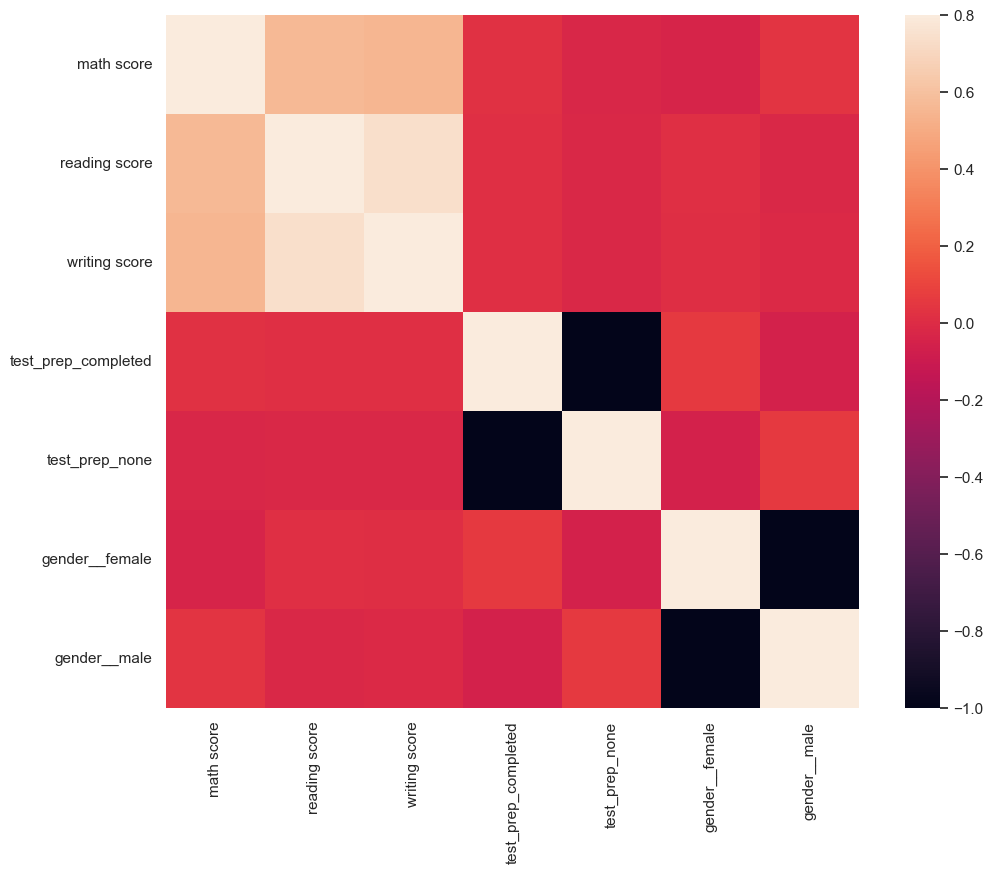

In [701]:
corrmat = data_new_2.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [743]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 14.433573362414146
RMSE on Test set : 12.356282943303116


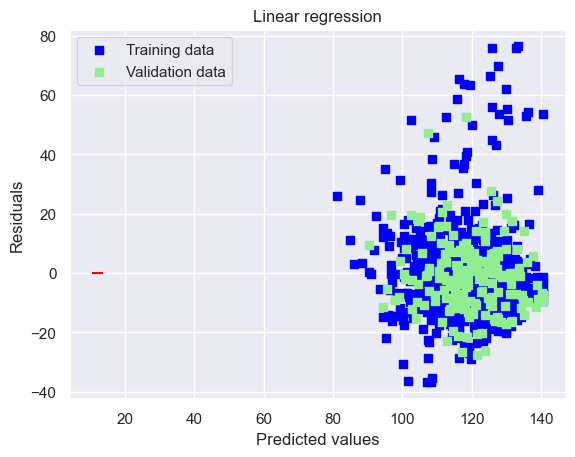

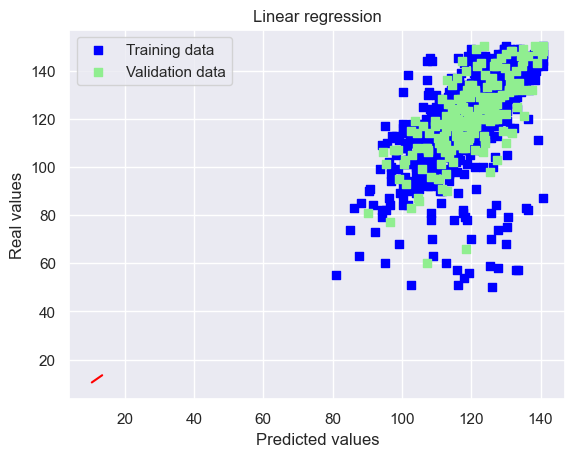

In [747]:

X_1 = data_new_2[['reading score', 'writing score','test_prep_completed', 'test_prep_none']]
y_1 = data_new_2['math score']

# Splitting the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)


# Linear Regression
lr = LinearRegression()
lr.fit(X_train_1, y_train_1)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train_1)
y_test_pred = lr.predict(X_test_1)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Linear Regression with Ridge regularization (L2 penalty)

Linear Regression with Ridge regularization is a linear regression method that adds a regularization term to the loss function to prevent overfitting. The regularization term is a penalty on the size of the coefficients, which forces them to stay small. This is achieved by adding the L2 norm of the coefficients (squared sum of the magnitude of the coefficients) multiplied by a hyperparameter called alpha, to the least squares loss function. The alpha hyperparameter controls the strength of the regularization, with larger values leading to more regularization and smaller values leading to less regularization. 

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 14.433534135392886
Ridge RMSE on Test set : 12.347341975094043


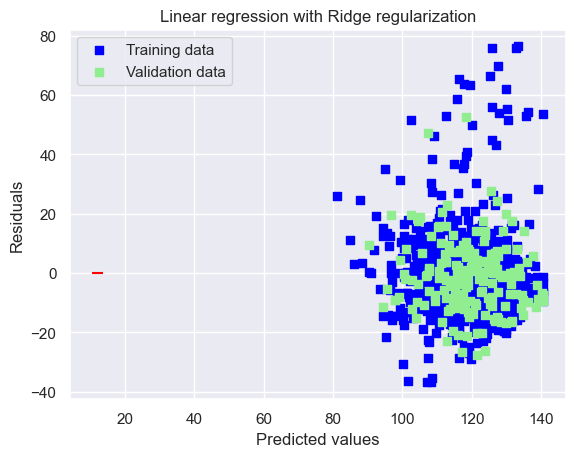

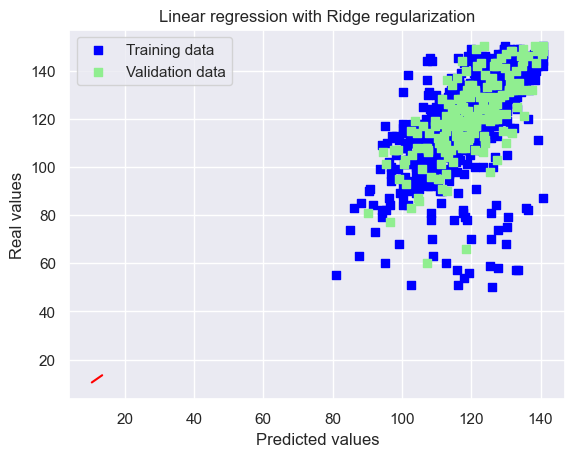

Ridge picked 4 features and eliminated the other 0 features


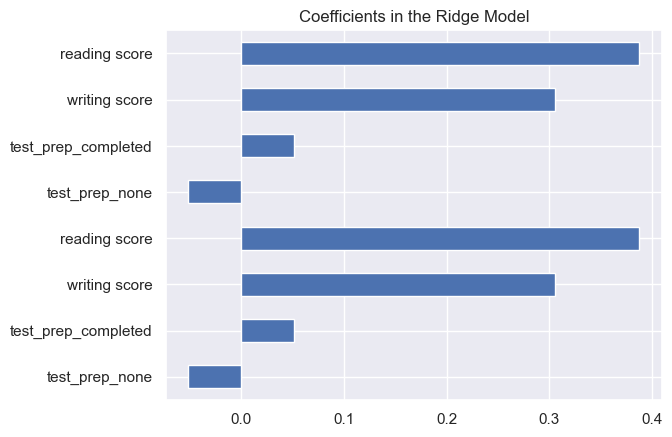

In [750]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train_1, y_train_1)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train_1, y_train_1)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train_1)
y_test_rdg = ridge.predict(X_test_1)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train_1.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Linear Regression with Lasso regularization (L1 penalty) 

Linear Regression with Lasso regularization (L1 penalty) is a variation of linear regression that adds an L1 penalty to the cost function, which is the sum of squared errors between the predicted values and actual values. The L1 penalty adds a term to the cost function that is proportional to the absolute value of the coefficients of the regression model. This penalty encourages sparsity in the coefficient estimates, meaning that it encourages many coefficients to be exactly zero, effectively performing feature selection.

Best alpha : 0.3
Try again for more precision with alphas centered around 0.3
Best alpha : 0.345
Lasso RMSE on Training set : 14.433655236907956
Lasso RMSE on Test set : 12.358286316694715


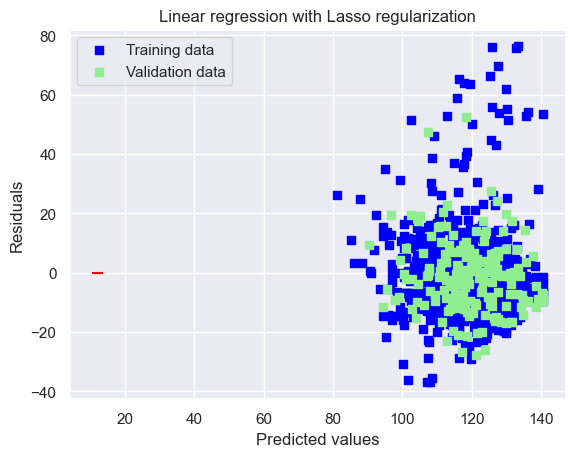

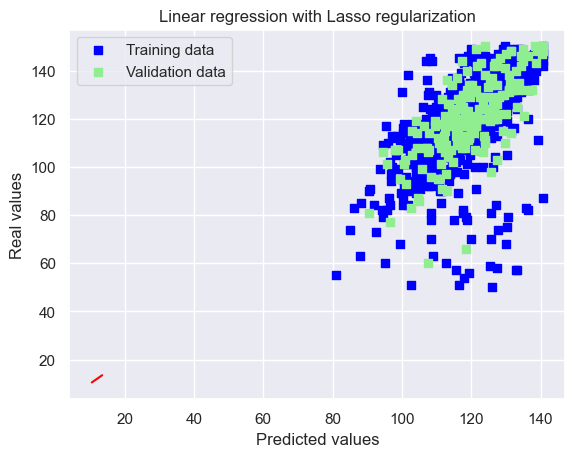

Lasso picked 2 features and eliminated the other 2 features


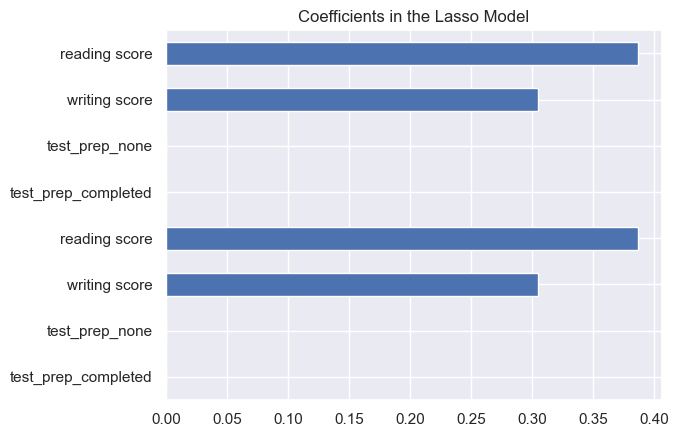

In [751]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train_1, y_train_1)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train_1, y_train_1)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train_1)
y_test_las = lasso.predict(X_test_1)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train_1.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

## Linear Regression with ElasticNet regularization (L1 and L2 penalty)

Linear Regression with ElasticNet regularization is a combination of L1 (Lasso) and L2 (Ridge) regularization methods. It is used to prevent overfitting and improve the generalization of the model by adding a penalty term to the loss function of the linear regression.

The ElasticNet regularization adds two penalty terms to the linear regression loss function: one is the L1 penalty that shrinks the coefficients of less important features to zero, and the other is the L2 penalty that reduces the magnitude of the coefficients of important features. The two penalties can be controlled by two hyperparameters: alpha and l1_ratio.

The alpha hyperparameter controls the overall strength of the regularization, while the l1_ratio hyperparameter controls the balance between the L1 and L2 penalties. If l1_ratio = 0, the ElasticNet regularization is equivalent to Ridge regularization, and if l1_ratio = 1, it is equivalent to Lasso regularization. If 0 < l1_ratio < 1, it is a combination of the two.

Best l1_ratio : 0.1
Best alpha : 6.0
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 6.0
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 6.0
Best l1_ratio : 0.085
Best alpha : 8.100000000000001
ElasticNet RMSE on Training set : 14.433731590578967
ElasticNet RMSE on Test set : 12.301724008317212


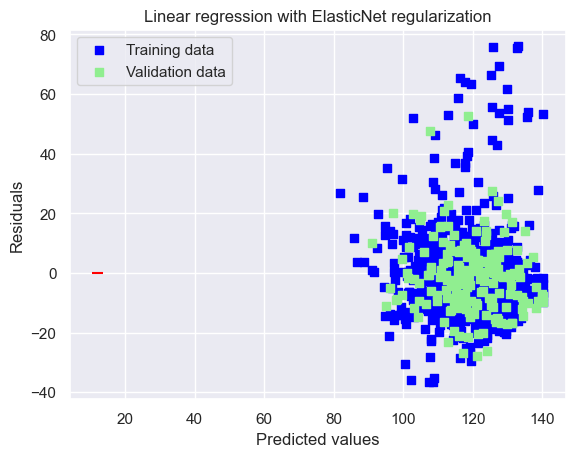

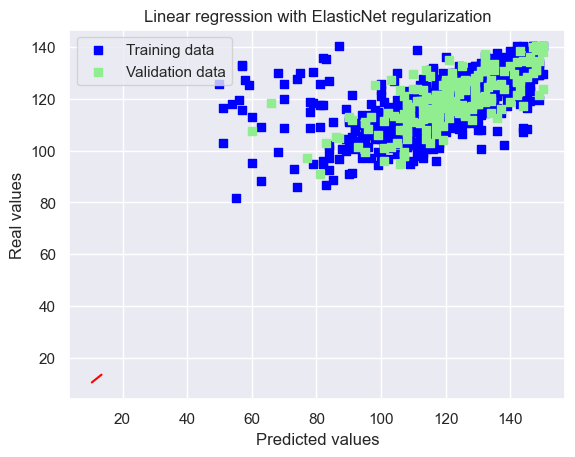

ElasticNet picked 2 features and eliminated the other 2 features


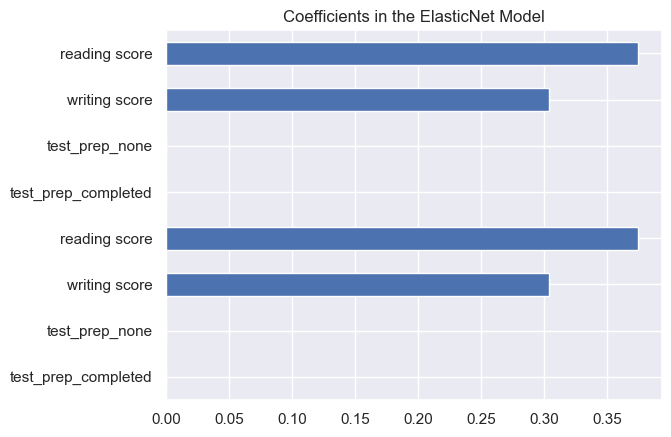

In [754]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_1, y_train_1)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_1, y_train_1)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_1, y_train_1)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train_1)
y_test_ela = elasticNet.predict(X_test_1)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train_1, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test_1, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_1, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_1, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train_1.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

# Conclusion

I started with analyzing the data, after analyzing the data, I started with data cleanup. I found some cells have missing values .
As a pre-processing step , the best way I could find is to basically eliminate those empty cells. I could not find any other relevent 
pre-processing relevent here. then I moved to finding the correleation matrix. Then I started building the model. I found one more feature 
could be added in model. I added and analyzed the RMSE, which improved little bit. 

To further improve the model, I tried L1, L2 regularization, which somewhat did not help much.

